In [1]:
#Import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("all_data.csv")
df.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
#Unique countries
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
#Rename long country names
df['Country'] = df.apply(lambda x: 'United States' if (x['Country']=='United States of America') 
                         else x['Country'], axis=1)
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States', 'Zimbabwe'],
      dtype=object)

In [8]:
#Rename
df.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

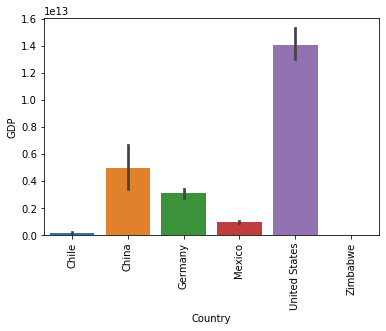

In [9]:
#Compare average gross domestic product GDP
ax = sns.barplot(x="Country", y="GDP", data=df)
plt.xticks(rotation=90)

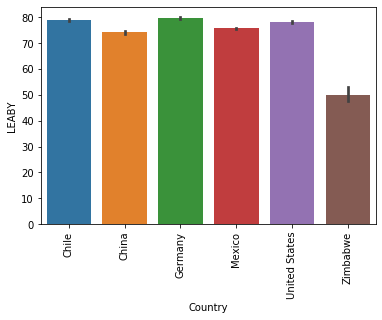

In [10]:
#Life expectancy at birth (years) LEABY
ax = sns.barplot(x="Country", y="LEABY", data=df)
plt.xticks(rotation=90)
plt.show()

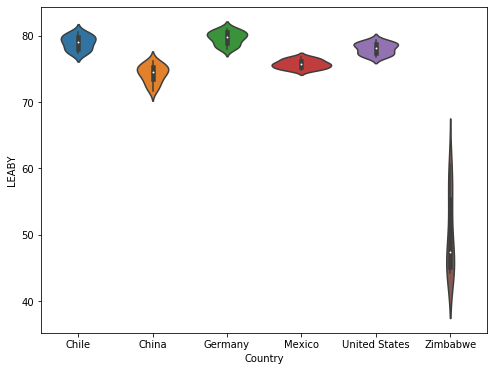

In [33]:
#Life expectancy distribution
fig = plt.subplots(figsize=(8, 6)) 
sns.violinplot(x="Country", y="LEABY", data=df)
plt.show()

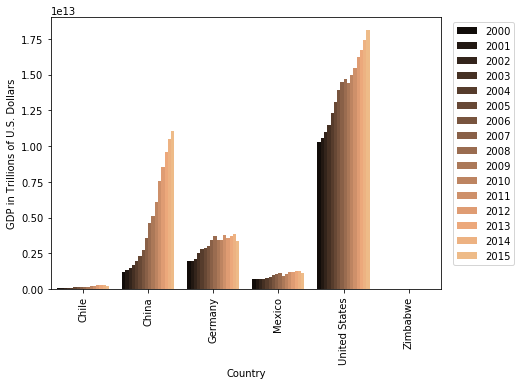

In [37]:
#GDP over time
f, ax = plt.subplots(figsize=(7, 5)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df,  palette="copper")
plt.xticks(rotation=90)
ylabel="GDP in Trillions of U.S. Dollars"
plt.ylabel(ylabel)
ax.legend(bbox_to_anchor=(1.2, 1))
plt.show()


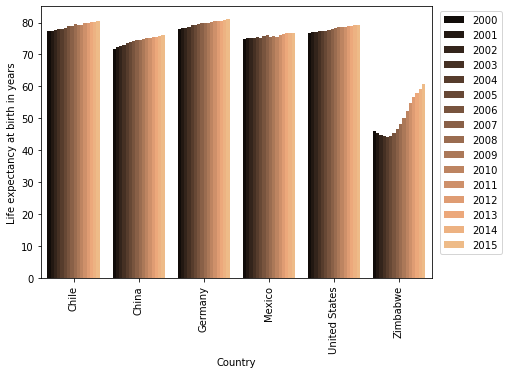

In [38]:
#Lif expectancy over time
f, ax = plt.subplots(figsize=(7, 5)) 
ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df, palette="copper")
plt.xticks(rotation=90)
plt.ylabel(ylabel)
ax.set(ylabel="Life expectancy at birth in years")
ax.legend(bbox_to_anchor=(1.01, 1),)
plt.show()


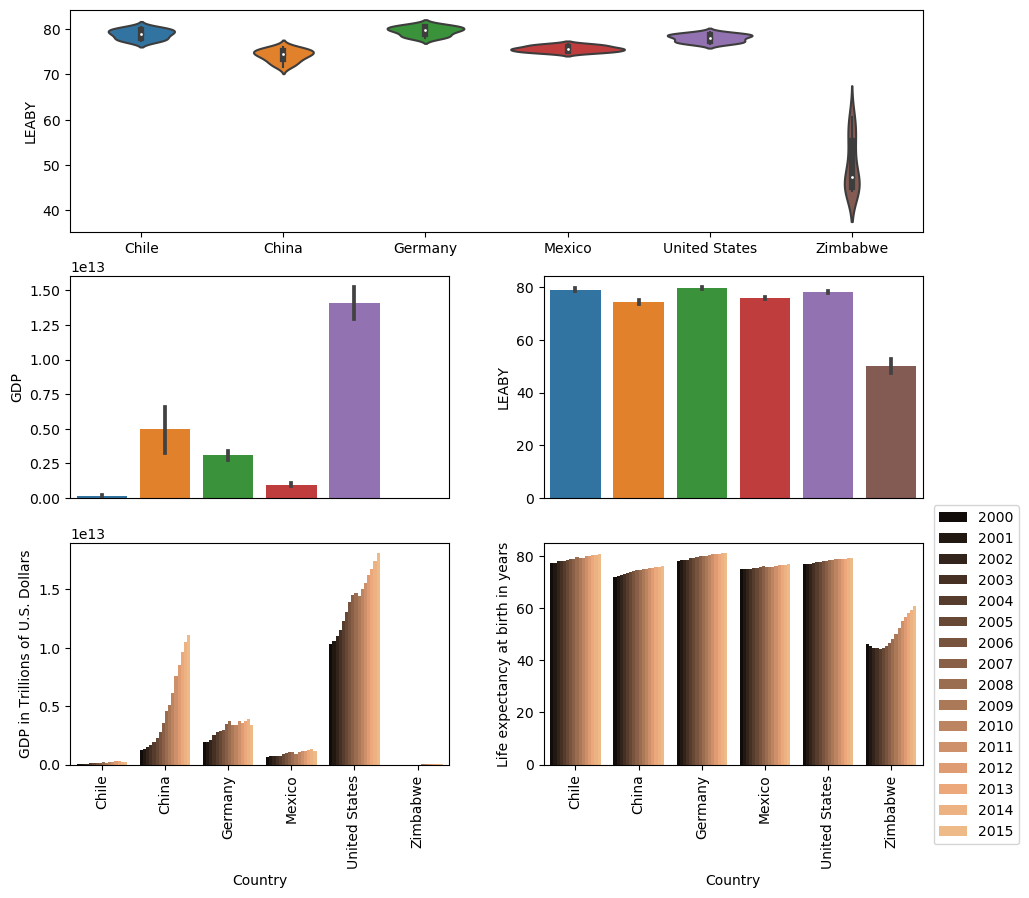

In [130]:
#Overview plot
fig = plt.figure(figsize=(11, 10), dpi=100)
plt.subplots_adjust(hspace=.2, wspace=0.25)
ax0 = fig.add_subplot(311)
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(324)
ax3 = fig.add_subplot(325)
ax4 = fig.add_subplot(326)

#0
sns.violinplot(x="Country", y="LEABY", data=df, ax=ax0)
ax0.set_xlabel('')

#1
sns.barplot(x="Country", y="GDP", data=df, ax=ax1)
ax1.tick_params(axis='x', rotation=20)
ax1.set_xticks([])
ax1.set_xlabel('')

#2
sns.barplot(x="Country", y="LEABY", data=df, ax=ax2)
ax2.tick_params(axis='x', rotation=20)
ax2.set_xticks([])
ax2.set_xlabel('')

#3
sns.barplot(x="Country", y="GDP", hue="Year", data=df,  palette="copper", ax=ax3)
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel("GDP in Trillions of U.S. Dollars")
ax3.get_legend().remove()

#4
sns.barplot(x="Country", y="LEABY", hue="Year", data=df, palette="copper", ax=ax4)
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylabel("Life expectancy at birth in years")
ax4.legend(bbox_to_anchor=(1.01, 1.2),)

plt.show()

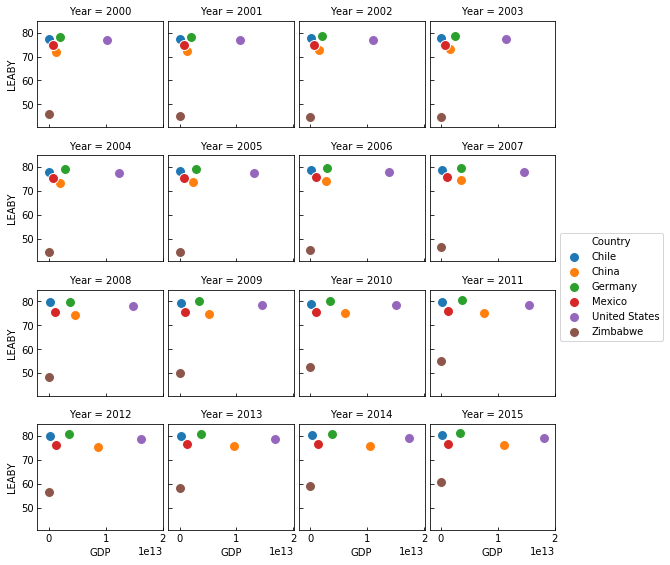

In [108]:
# Scatter plots of GDP and life expectancy data
g = sns.FacetGrid(df, col="Year", hue="Country", col_wrap=4, height=2, despine=False)
g = (g.map(plt.scatter, "GDP", "LEABY", edgecolor="w", s=100))
g.fig.subplots_adjust(wspace=0.04)
plt.legend(title='Country', bbox_to_anchor=(1.9, 2.85),)
for ax in g.axes.flatten():
    ax.tick_params(direction='in')

plt.show()

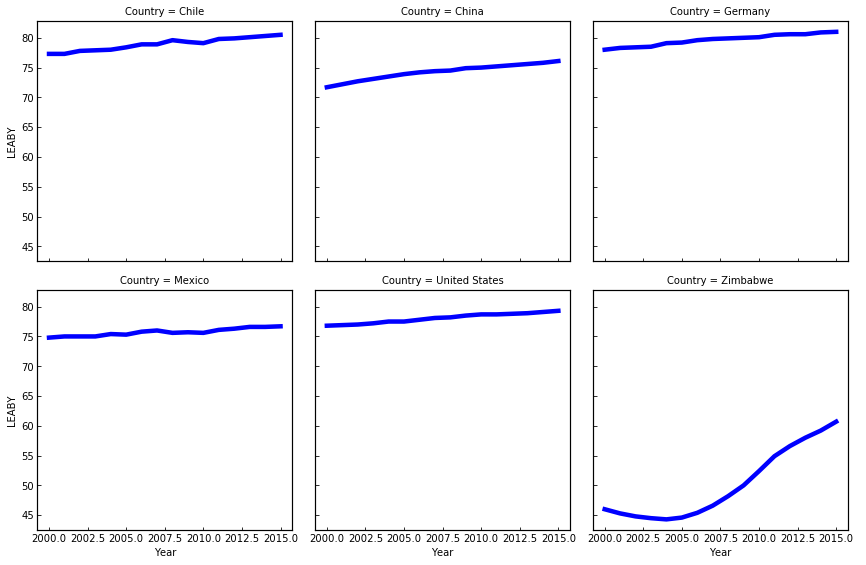

In [95]:
#Line plots life expectancy
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4, despine=False)
g3 = (g3.map(plt.plot, "Year", "LEABY",color="b", lw=4.5).add_legend())
for ax in g3.axes.flatten():
    ax.tick_params(direction='in')
    for axis in ['bottom','left','right', 'top']:
        ax.spines[axis].set_linewidth(1.2)
plt.show()

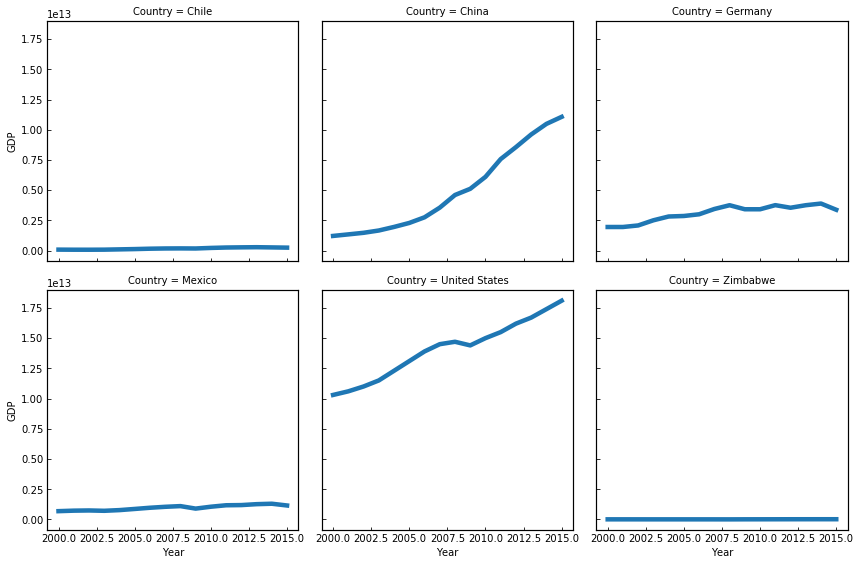

In [100]:
#Line plots GDP
g2 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4, despine=False)
g2 = (g2.map(plt.plot, "Year", "GDP", lw=4.5).add_legend())
for ax in g2.axes.flatten():
    ax.tick_params(direction='in')
    for axis in ['bottom','left','right', 'top']:
        ax.spines[axis].set_linewidth(1.2)
plt.show()
